> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [28]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np


In [29]:
#string count,#record creation

def createnewrow(columnName, dataFrame):

    lens = dataFrame['genres'].str.len()
    repeat = np.repeat(dataFrame.index.values, lens)
    return dataFrame.loc[repeat].assign(genres=np.concatenate(dataFrame['genres'].values)).reset_index(drop=True)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [30]:
#read csv and see data
df = pd.read_csv('tmdb-movies.csv')

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [31]:
# DROP COLUMN 
df.drop( ['id','imdb_id','homepage','original_title','cast','director','tagline','keywords','overview','runtime','production_companies'], axis=1, inplace=True) 

In [32]:
#sum dublicated data and drop
df.duplicated().sum()
df.drop_duplicates(inplace=True) 

In [33]:
#filtering 
df= df.query('budget > 0 and vote_count > 0') 


In [34]:
# drop  null row and control data
df.dropna(inplace=True)
df.isnull().sum()

popularity      0
budget          0
revenue         0
genres          0
release_date    0
vote_count      0
vote_average    0
release_year    0
budget_adj      0
revenue_adj     0
dtype: int64

In [35]:
#revenue / budget value calculate
df['revenue_budget']= df.revenue/df.budget

In [36]:
#Vote point calculate
df['vote_point']=df['vote_average']*df['vote_count']

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### How is popularity trending effect avarage  vote on movie genres?

In [37]:
# We start with creating a new dataframe from the series with vote_average as the index
df['genres']= df.genres.str.split('|').tolist() 

In [38]:
df=createnewrow('genres',df)

In [39]:
# new dataframe create
new_df = pd.DataFrame(df, columns = ['genres', 'vote_average','vote_count','popularity','vote_point'])


In [40]:
#mean  vote avarage
new_df=new_df.groupby('genres').sum()

In [41]:
new_df['order']=new_df['vote_point']/new_df['vote_count']

In [42]:
new_df.head()

,vote_average,vote_count,popularity,vote_point,order
genres,,,,,
Action,8395.6,895995,1853.911888,5891686.5,6.575580
Adventure,5443.5,725636,1468.764202,4826798.7,6.651818
Animation,1652.5,184112,378.331238,1260659.3,6.847241
Comedy,10346.8,565609,1535.667232,3644505.3,6.443507
Crime,5115.0,351479,812.839420,2386356.1,6.789470


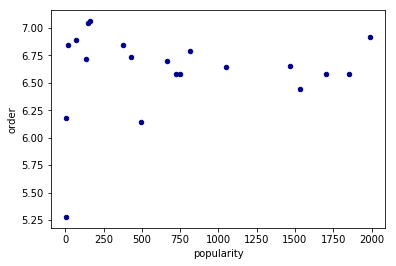

In [43]:

new_df.plot.scatter(x='popularity',y='order', c='DarkBlue')

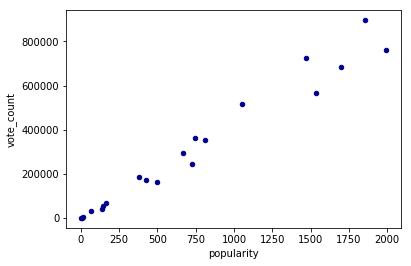

In [44]:
new_df.plot.scatter(x='popularity',y='vote_count', c='DarkBlue')

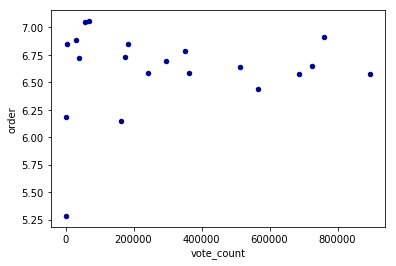

In [45]:
new_df.plot.scatter(x='vote_count',y='order', c='DarkBlue')

###  What kind of movies would you prefer if you were an investor in a movie?

In [46]:
# group by genres and count record
new_df2=df.groupby('genres', as_index=False)['genres'].agg(['count'])


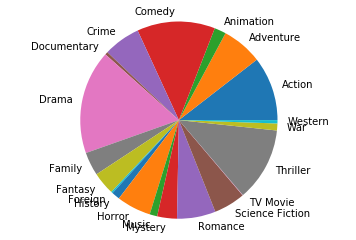

In [47]:
#pie show
plt.pie(new_df2,labels=new_df2.reset_index()['genres'].values)
plt.axis('equal')
plt.show()

In [48]:
# group by genres and count record
new_df2=df.groupby('genres', as_index=False)['revenue_budget'].agg(['sum'])

In [49]:
new_df2=new_df2.reset_index()

In [50]:
new_df2.head()

,genres,sum
0,Action,1.022447e+06
1,Adventure,1.021804e+06
2,Animation,8.498073e+02
3,Comedy,9.389457e+04
4,Crime,2.265626e+03


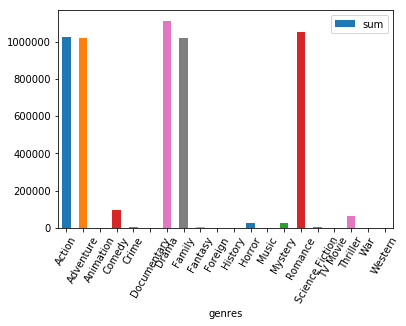

In [54]:
#pie show
new_df2.plot.bar(x='genres', y='sum', rot=60)

In [24]:
new_df2=df.groupby('genres').agg({'genrescount':'count','revenue_budget':'sum'})
new_df2.head()

,genres,revenue_budget
genres,,
Action,1428,1.022447e+06
Adventure,906,1.021804e+06
Animation,260,8.498073e+02
Comedy,1740,9.389457e+04
Crime,823,2.265626e+03


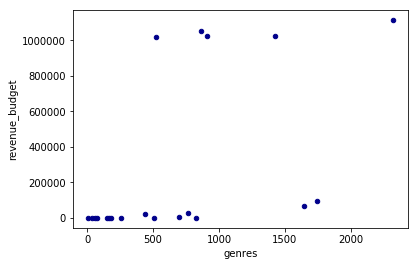

In [25]:
new_df2.plot.scatter(x='genrescount',y='revenue_budget', c='DarkBlue')

<a id='conclusions'></a>
## Conclusions

> **Tip**: popularity and voting rates show similar graphs,There are species with a voting rate below 6.25.


> **Tip**: Family type is produced less than other types but earns more income.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [26]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0